# Assessing feature performance

DWPC = 0.4, computed on a subset of non-indications

In [2]:
import re

import matplotlib.pyplot
import pandas
import mpld3
import mpld3.plugins
import seaborn

%matplotlib inline

In [4]:
auroc_df = pandas.read_table('data/auroc.tsv')
auroc_df.head(2)

,metapath,nonzero,seconds_per_query,auroc,auroc_permuted,delta_auroc,pval_auroc,length
0,CbGaD,0.2330,0.0108,0.752,0.642,0.109000,0.000004,2
1,CbGdD,0.0275,0.0109,0.523,0.523,0.000259,0.474000,2


## Performance by path length

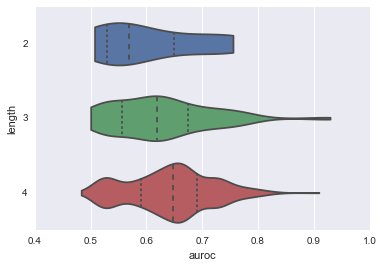

In [5]:
ax = seaborn.violinplot(x='auroc', y='length', data=auroc_df, cut=0, orient='h', inner='quartile')

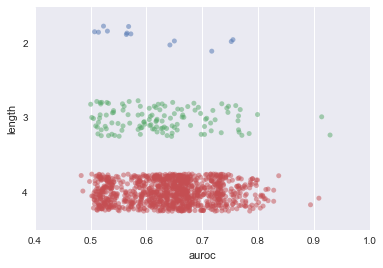

In [6]:
ax = seaborn.stripplot(x='auroc', y='length', data=auroc_df, jitter=0.25, orient='h', alpha = 0.5)

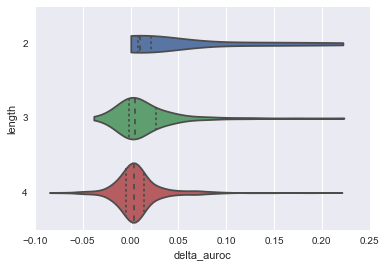

In [7]:
ax = seaborn.violinplot(x='delta_auroc', y='length', data=auroc_df, cut=0, orient='h', inner='quartile')

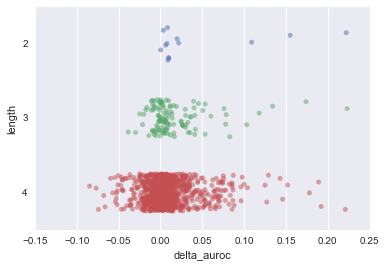

In [8]:
ax = seaborn.stripplot(x='delta_auroc', y='length', data=auroc_df, jitter=0.25, orient='h', alpha=0.5)

## Feature AUROC versus non-zero fraction

In [11]:
grid = seaborn.jointplot('nonzero', 'auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

In [ ]:
## Delta AUROC versus non-zero fraction

In [12]:
grid = seaborn.jointplot('nonzero', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Feature Permutation Hit versus AUROC

In [13]:
grid = seaborn.jointplot('auroc', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.apply(lambda x: '{}: {:.1%} nonzero'.format(x['metapath'], x['nonzero']), axis=1).tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Time per query

In [14]:
grid = seaborn.jointplot('seconds_per_query', 'auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

In [15]:
grid = seaborn.jointplot('seconds_per_query', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Performance by Metaedge

In [16]:
import hetio.readwrite

In [17]:
url = 'https://github.com/dhimmel/integrate/raw/e5ebbec3a7b96cc05b7a01a8d5776d6d94ed192a/data/metagraph.json'
metagraph = hetio.readwrite.read_metagraph(url)

In [23]:
rows = list()
for abbreviation in auroc_df.metapath:
    metapath = metagraph.metapath_from_abbrev(abbreviation)
    for edge in metapath.edges:
        edge = edge.inverse if edge.inverted else edge
        rows.append((abbreviation, str(edge), edge.get_standard_abbrev()))
metaedge_df = pandas.DataFrame(rows, columns=['metapath', 'metaedge', 'metaedge_abbrev'])
metaedge_df.to_csv('data/metaedge-in-metapath.tsv', sep='\t', index=False)
metaedge_df = metaedge_df.merge(auroc_df)

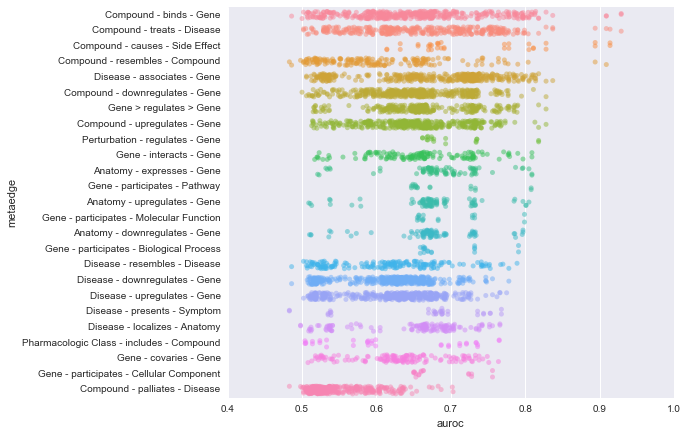

In [19]:
matplotlib.pyplot.figure(figsize=(8, 7))
order = metaedge_df.sort_values('auroc', ascending=False).drop_duplicates('metaedge').metaedge
ax = seaborn.stripplot(x='auroc', y='metaedge', data=metaedge_df, jitter=0.25, orient='h', alpha = 0.5, order=order)

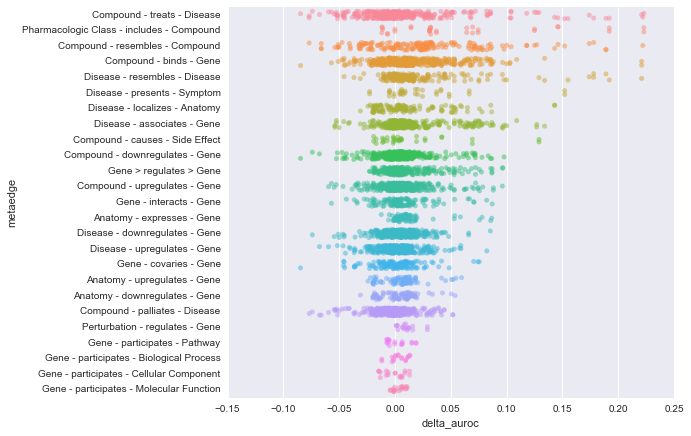

In [20]:
matplotlib.pyplot.figure(figsize=(8, 7))
order = metaedge_df.sort_values('delta_auroc', ascending=False).drop_duplicates('metaedge').metaedge
ax = seaborn.stripplot(x='delta_auroc', y='metaedge', data=metaedge_df, jitter=0.25, orient='h', alpha = 0.5, order=order)